
# <center>Project 4 :  Predictive Modeling with scikit-learn</center>

[Click here to jump to Predictive Analysis](#predictive-analysis)


MANOJ KUMAR SINGADE

#1. Introduction

Dataset I chosen is "Adults Income levels" taken from [UCI Data Base](https://archive.ics.uci.edu/dataset/2/adult) which includes information such as age, work class, education level, marital status, occupation, relationship, race, sex, capital gain, hours per week, country of residence, and income range. Exploring this dataset presents an opportunity to gain invaluable insights into various societal and economic aspects, including the relationship between education and income, disparities in income across demographic categories, and how factors like age, work, and hours worked per week may influence one's financial well-being. EDA of this dataset will not only provide a deeper understanding of these interactions but may also offer critical perspectives on income inequality, gender pay gaps, and socio-economic mobility—essential topics for addressing economic disparities and formulating equitable policy solutions. The project will involve data visualization, statistical analysis, and the application of data-driven techniques to unravel the intricate relationships within this extensive dataset. Ultimately, the findings derived from this EDA can serve as a foundation for informed decision-making and policy recommendations in the realm of socio-economic dynamics.

### Research Questions:

1. Is there evidence of a gender pay gap within this dataset? Analyze income data to determine whether there is a significant difference in earnings between males and females.

2. Investigate whether individuals with higher education levels tend to achieve greater income mobility and assess the extent to which education is a predictor of income growth.

3. Do individuals working longer hours per week tend to earn higher incomes, or is there an optimal work-life balance that leads to better financial outcomes? Analyze the relationship between hours worked per week and income.

4. Is there any trend in income level range across demographic categories such as race, marital status, and country of residence.

#2. Data Summary

I picked the data from subset of adult income levels data set from UCI Database.

My data contains 48842 observations and 15 attributes.

>Attributes:

1. age : Age
2. workclass : workclass of the individual
3. fnlwgt
4. education : education level
5. education num : unique identification number
6. marital-status
7. Occupation
8. Race
9. sex
10. capital-gain
11. capital-loss
12. hours-per-week
13. native country
14. income (range)
15. Relationship


In [1]:
#importing the uci databases
!pip install ucimlrepo

In [2]:
#importing the modules required for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing all the required libraries

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
adult = fetch_ucirepo(id=2)

Above piece of code will fetch the dataset

In [4]:
#concatenating the data set of both features and the target variable making the complete data set
adult_df = pd.concat([adult.data.features, adult.data.targets], axis=1)
#adult_df.to_csv("adults.csv")
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Here can see that there are 48842 observations and 15 columns in the dataset.

In [5]:
#attribute data types
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Above results shows the data types of al attributes in the dataset.

In [6]:
adult_df.shape

(48842, 15)

Data set has 48842 observations and 15 attributes

#3. Exploratory Data Analysis

To advance in this research section, we will begin by performing a comprehensive summary statistics analysis for each of the variables. Our primary focus will be on detecting any potential outliers or missing values that might exert an impact on our findings. Subsequently, we will supplement our analysis with visual representations for each attribute using  Seaborn and Matplotlib.

In [7]:
#lets check for missing values in the data set
adult_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

As there were lot of missing values in columns namely workclass occupation and native country so instead of removing these large number of values I will use data imputation techniques further after EDA

In [8]:
#there are some special characters in workclass column so I will replace it with Unknown
adult_df['workclass'] = adult_df['workclass'].replace('?', 'Unknown')
#also in income level there are onl y two income levels but due a dot it made them into 4 levels sowe handle them
adult_df['income'] = adult_df['income'].replace('<=50K.', '<=50K')
adult_df['income'] = adult_df['income'].replace('>50K.', '>50K')
#similarly for nativecountry column
adult_df['native-country'] = adult_df['native-country'].replace('?', 'Unknown')

In [9]:
#we will check the statistical summary of the dataset
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


The describe() method provides a comprehensive set of summary statistics that includes the mean, maximum, minimum, standard deviation, frequency counts, and quartile ranges. These statistics collectively offer valuable insights into the distribution and characteristics of the dataset, enabling a deeper understanding of the data's distribution and variability.

In [10]:
adult_df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

The average age is 38 years old and minimum age is 17 years old and the maximum age is 90 years old.

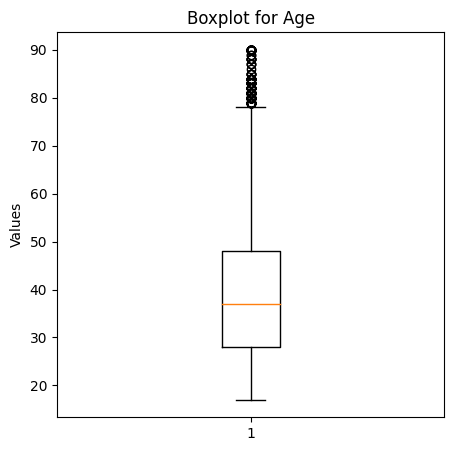

In [11]:
plt.figure(figsize=(5, 5))
plt.boxplot(adult_df['age'])
plt.title('Boxplot for Age')
plt.ylabel('Values')
plt.show()

It is evident that there are large number of outliers in the data

In [12]:
#workclass
adult_df['workclass'].describe()

count       47879
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

There are 9 different work class people and totally we have 48842 instances of data

In [13]:
#sex
adult_df['sex'].describe()

count     48842
unique        2
top        Male
freq      32650
Name: sex, dtype: object

We have only male and female in the data and male has more instances of data.

In [14]:
adult_df['education'].describe()

count       48842
unique         16
top       HS-grad
freq        15784
Name: education, dtype: object

It says that there were 16 different types of the education levels in the data and HS-Grad are the most common type of education level among the people

In [15]:
adult_df['marital-status'].describe()

count                  48842
unique                     7
top       Married-civ-spouse
freq                   22379
Name: marital-status, dtype: object

We have 7 unique types of marrital status in the data and Married-civSpouse is the most common marrital status prevailing among the people as per the data available

In [16]:
adult_df['occupation'].describe()

count              47876
unique                15
top       Prof-specialty
freq                6172
Name: occupation, dtype: object

In total data contains 15 different types of occupation among the data and Prof-Speciality being the most common among the people.

In [17]:
adult_df['race'].describe()

count     48842
unique        5
top       White
freq      41762
Name: race, dtype: object

There are 5 types of races involved in the data and White being the most common race.

In [18]:
adult_df['capital-gain'].describe()
#this is the capital gain a person has getting in a year

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

The average capital gain is 1079 USD and maximum being the 99999USd and Minimum is 0 USD

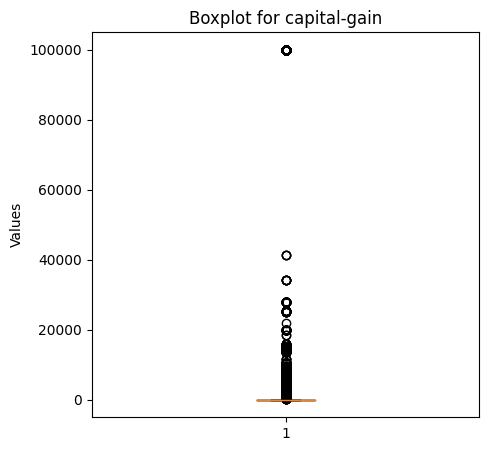

In [19]:
plt.figure(figsize=(5, 5))
plt.boxplot(adult_df['capital-gain'])
plt.title('Boxplot for capital-gain')
plt.ylabel('Values')
plt.show()

Can see lot of outliers which might impact our analysis.

### Age

In [22]:
#As we have age as numeric value to check the population age group in which people fall dividing age into age groups as below
age_bins = [0, 5, 10, 15,20,25,30,35,40,45,50,55,60,65, float('inf')]
age_labels = ['Under 5 ', '05-10', '10-15','15-20','20-25' ,'25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65 and over']
adult_df['age_group'] = pd.cut(adult_df['age'], bins=age_bins, labels=age_labels, right=False)


I have taken the age bins because if we have a age bin, its easier to analyse in which age range we have more income levels and also helps us to understand the impact of age on income level.To avoid information loss, I have taken the small age bins.

In [23]:
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,35-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50-55
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,35-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-55
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,25-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,35-40
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K,60-65
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,35-40
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,40-45


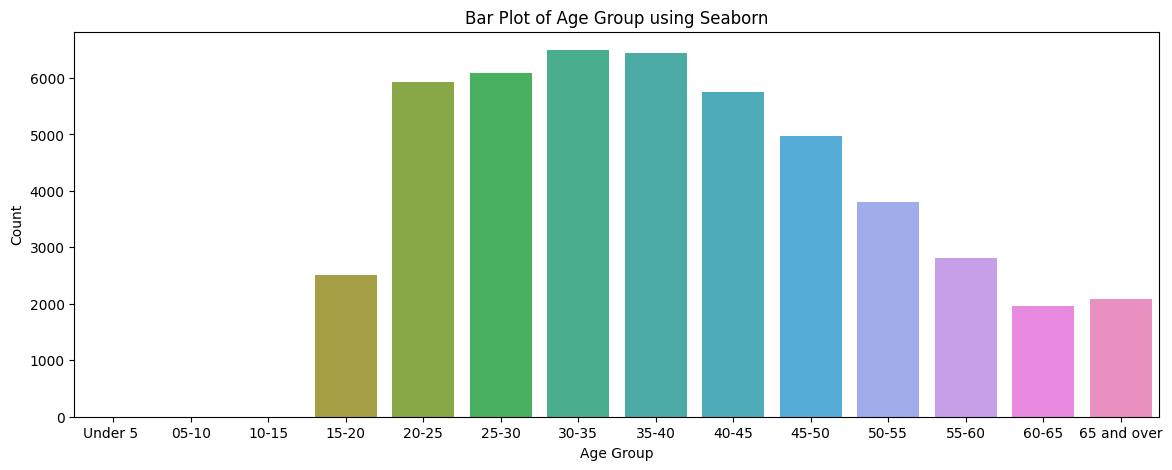

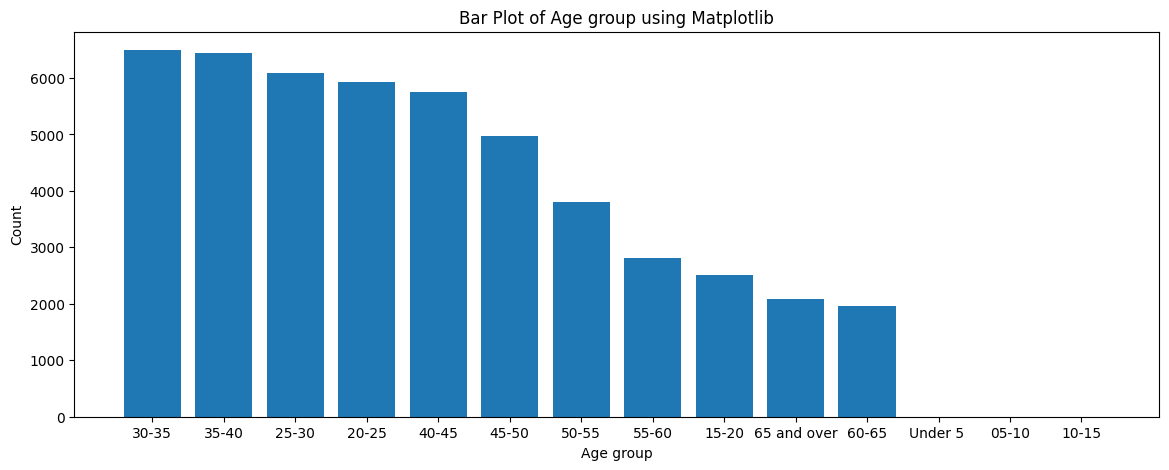

In [26]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['age_group'].value_counts().index, y=adult_df['age_group'].value_counts())
plt.title('Bar Plot of Age Group using Seaborn')
plt.xlabel('Age Group')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(14, 5))
age_counts = adult_df['age_group'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Age group using Matplotlib')
plt.xlabel('Age group')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


From above results most of the population fall under the age group 30-35 and 35-40 age ranges And Obviously kids with age less than 15 years age cannot earn anything which resembles that data was authentic.

### Sex

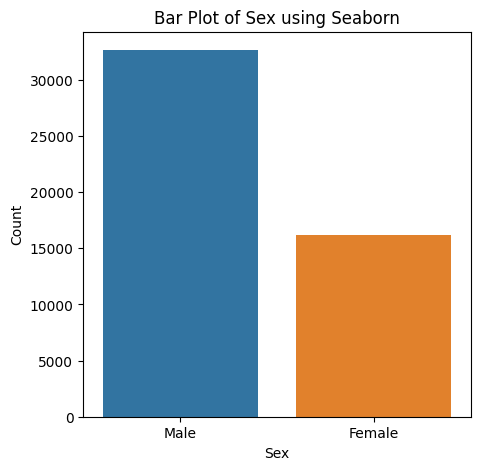

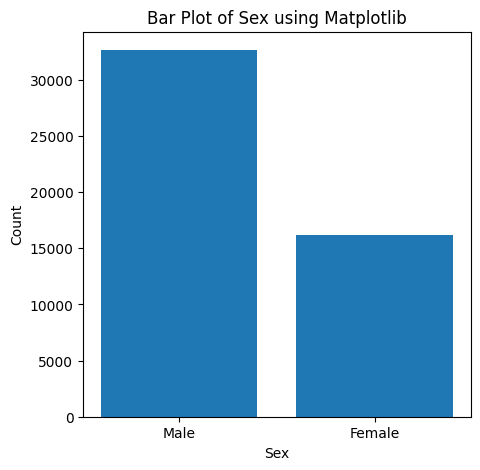

In [28]:
# Set the figure size
plt.figure(figsize=(5, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['sex'].value_counts().index, y=adult_df['sex'].value_counts())
plt.title('Bar Plot of Sex using Seaborn')
plt.xlabel('Sex')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(5, 5))
age_counts = adult_df['sex'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Sex using Matplotlib')
plt.xlabel('Sex')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


#### Findings:
There is a skew in tha data that population in the data are mostly male and the populatin of females is very less and its a unbalanced data

### Race

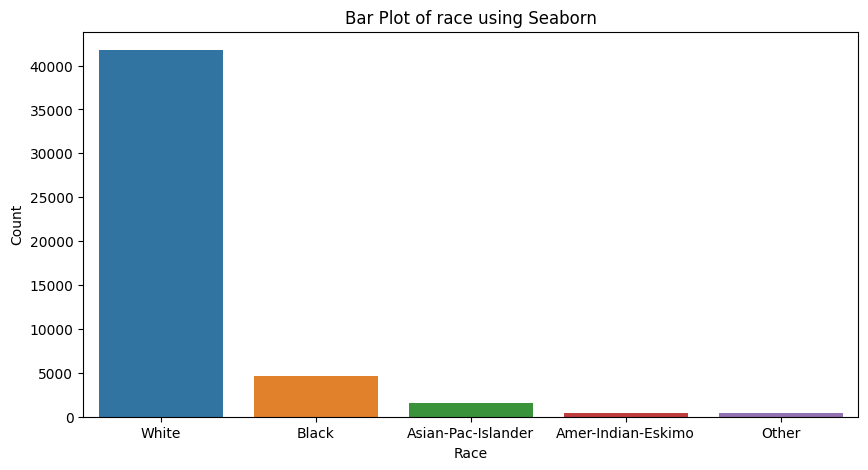

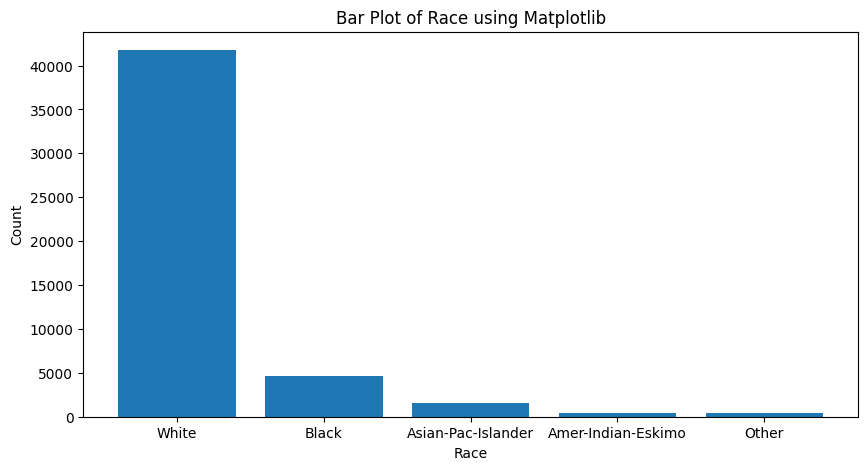

In [29]:
# Set the figure size
plt.figure(figsize=(10, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['race'].value_counts().index, y=adult_df['race'].value_counts())
plt.title('Bar Plot of race using Seaborn')
plt.xlabel('Race')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(10, 5))
age_counts = adult_df['race'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Race using Matplotlib')
plt.xlabel('Race')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


#### Findings:
The data contains that most people are from White followed by the Black.From this we can say that data is authentic because as per the logic, legal immigrants like Asian-Pac and others will absolutely less as the legal immigrants on work in USA might be less.

### Workclass

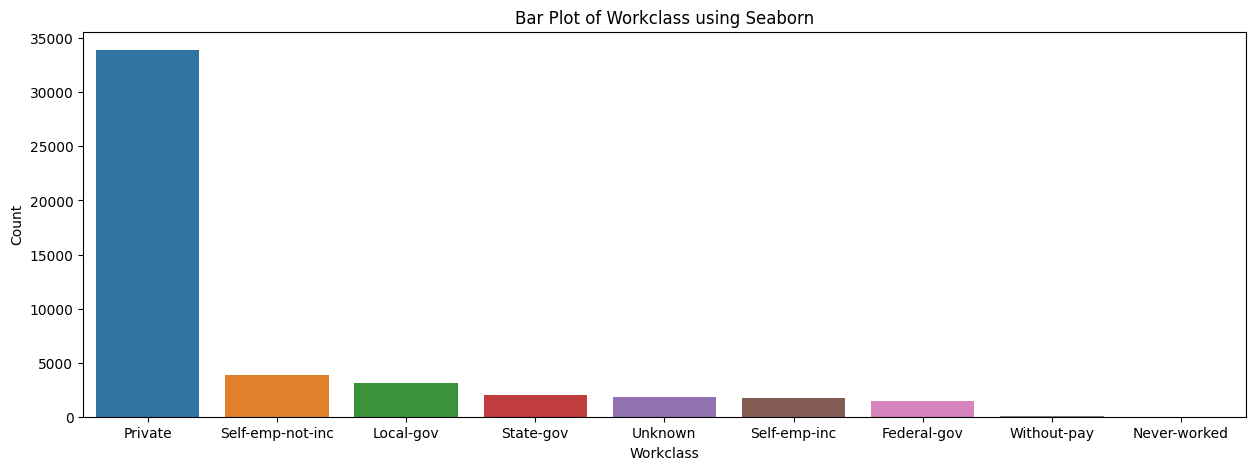

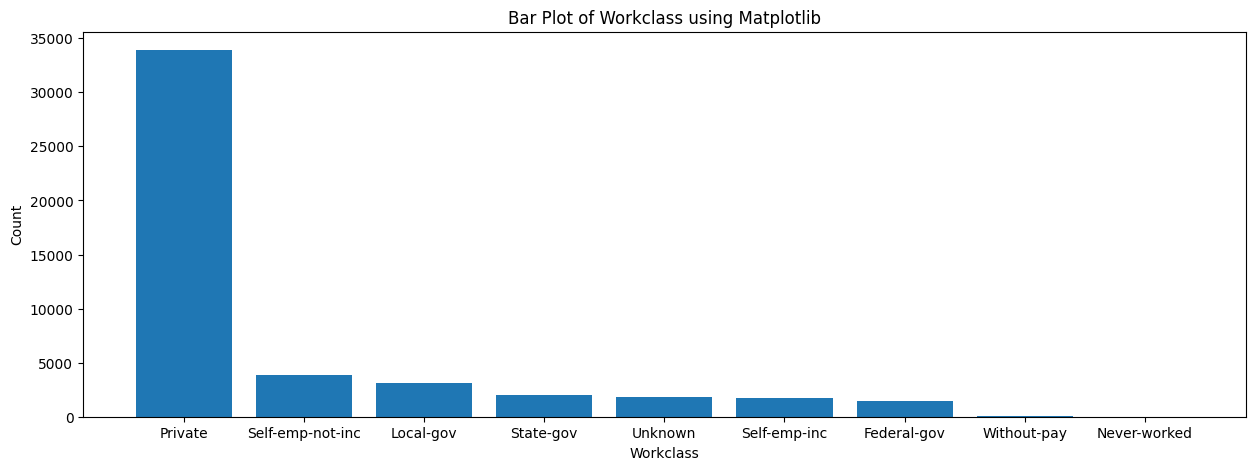

In [30]:
# Set the figure size
plt.figure(figsize=(15, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['workclass'].value_counts().index, y=adult_df['workclass'].value_counts())
plt.title('Bar Plot of Workclass using Seaborn')
plt.xlabel('Workclass')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(15, 5))
age_counts = adult_df['workclass'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Workclass using Matplotlib')
plt.xlabel('Workclass')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


#### Findings
It is clear that most people working in private organization followed by the Self Employment.

### Education level


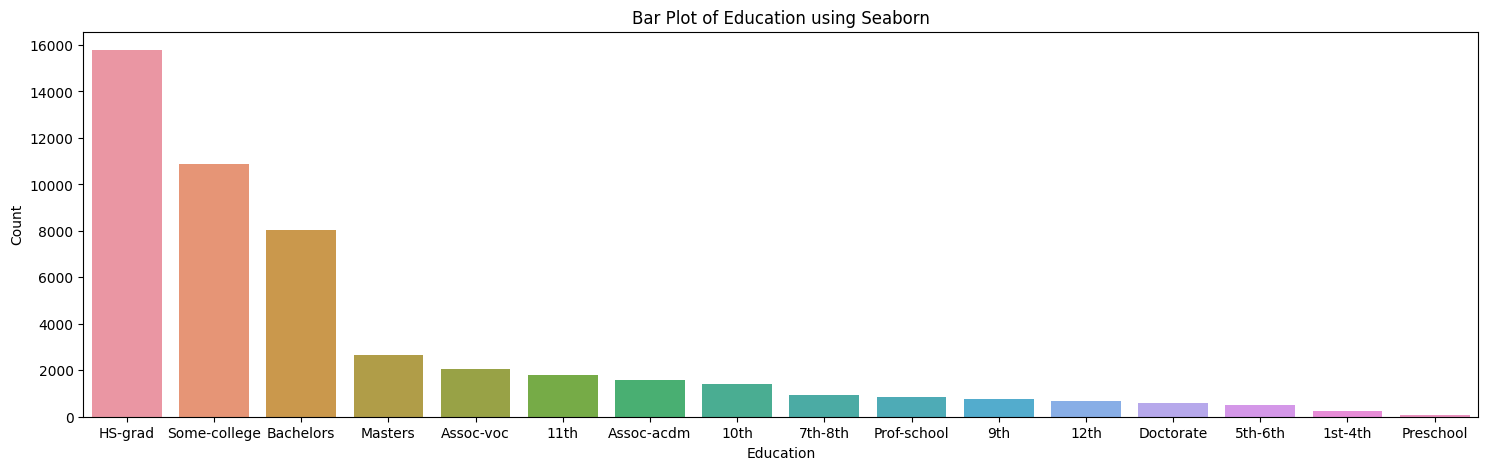

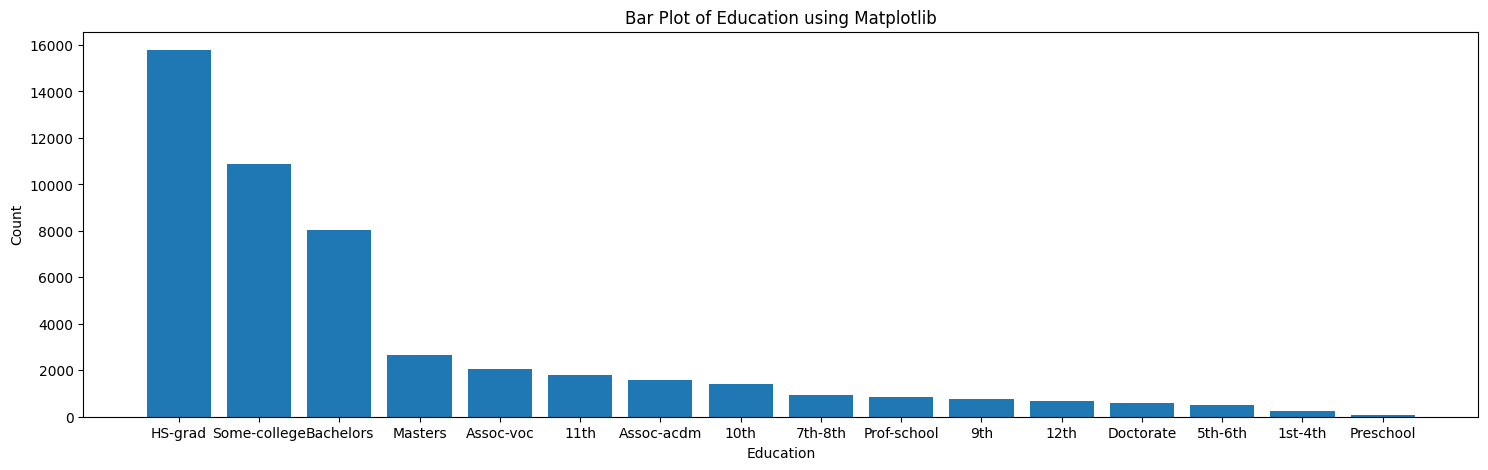

In [31]:
# Set the figure size
plt.figure(figsize=(18, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['education'].value_counts().index, y=adult_df['education'].value_counts())
plt.title('Bar Plot of Education using Seaborn')
plt.xlabel('Education')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(18, 5))
age_counts = adult_df['education'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of Education using Matplotlib')
plt.xlabel('Education')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()


#### Findings:

The people with education level HS-Grad are very high compared to the Some college level education and then Bachelors.People are less interested in higher studies like Masters , Doctorate etc

## Marital - Status

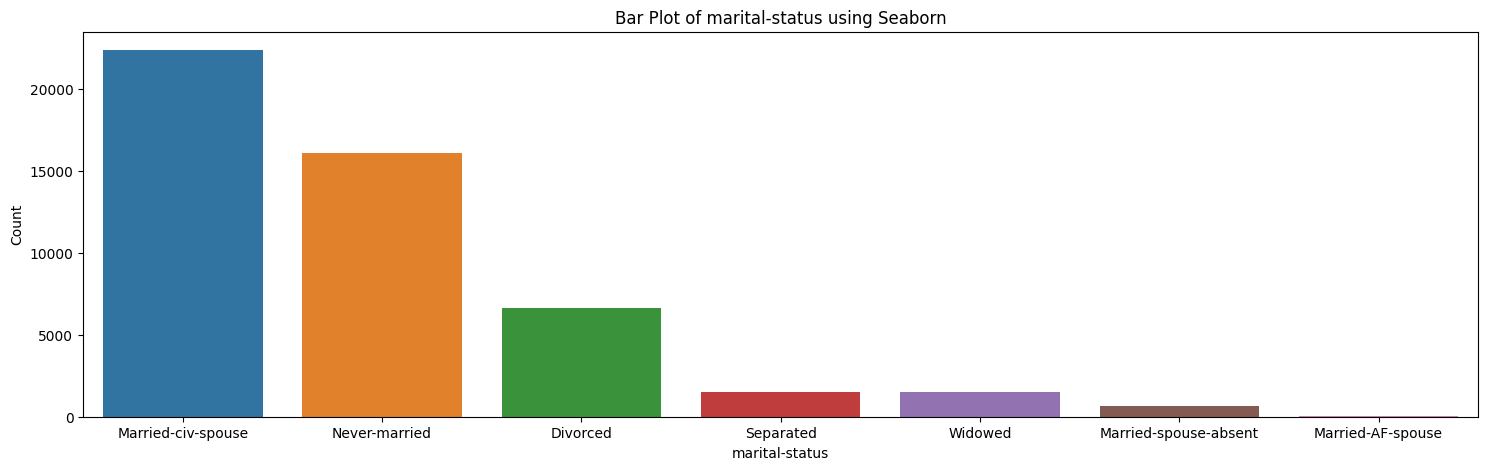

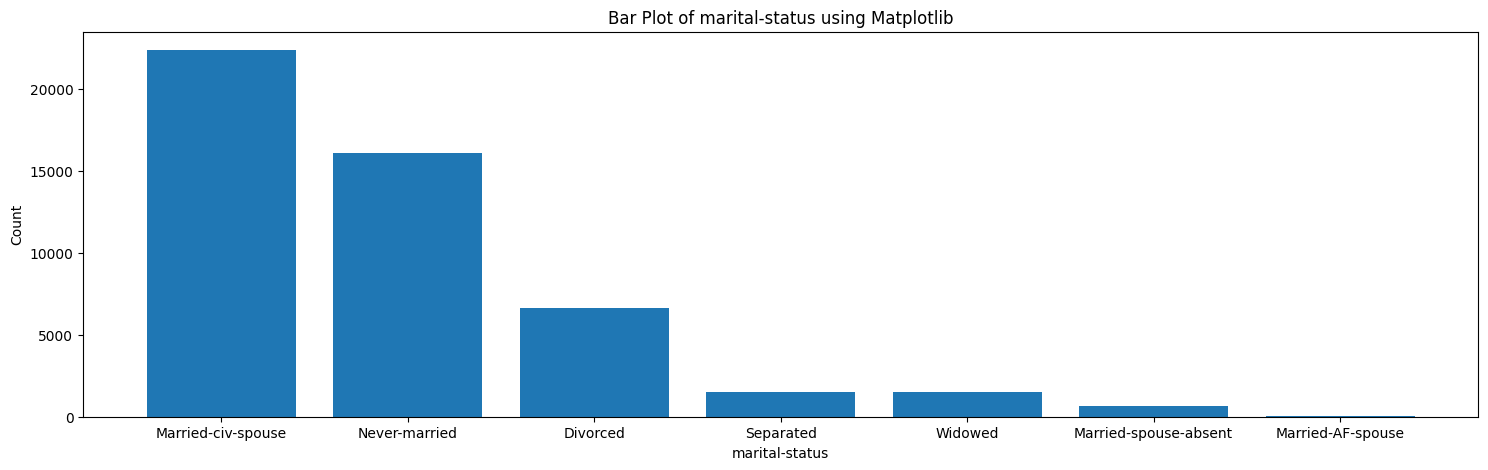

In [32]:
# Set the figure size
plt.figure(figsize=(18, 5))
# Using Seaborn
sns.barplot(data=adult_df, x=adult_df['marital-status'].value_counts().index, y=adult_df['marital-status'].value_counts())
plt.title('Bar Plot of marital-status using Seaborn')
plt.xlabel('marital-status')
plt.ylabel('Count')
# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(18, 5))
age_counts = adult_df['marital-status'].value_counts()
plt.bar(age_counts.index, age_counts)
plt.title('Bar Plot of marital-status using Matplotlib')
plt.xlabel('marital-status')
plt.ylabel('Count')
# Show the Matplotlib plot
plt.show()

####Findings:

Married-civ-spouse are the majority marital status who were working and then followed by the Never marries who are Unmarried people.

## Hours Per Week

In [34]:
avg_hours=adult_df.groupby('age_group')['hours-per-week'].mean().reset_index()
avg_hours

,age_group,hours-per-week
0,Under 5,NaN
1,05-10,NaN
2,10-15,NaN
3,15-20,26.673307
4,20-25,35.540696
5,25-30,41.388624
6,30-35,42.781953
7,35-40,43.599223
8,40-45,43.469434
9,45-50,43.387233


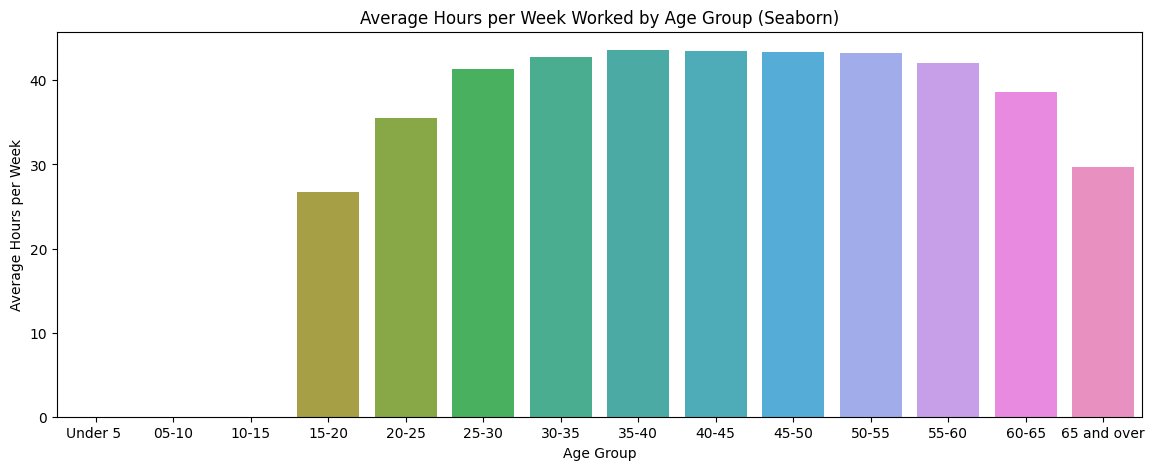

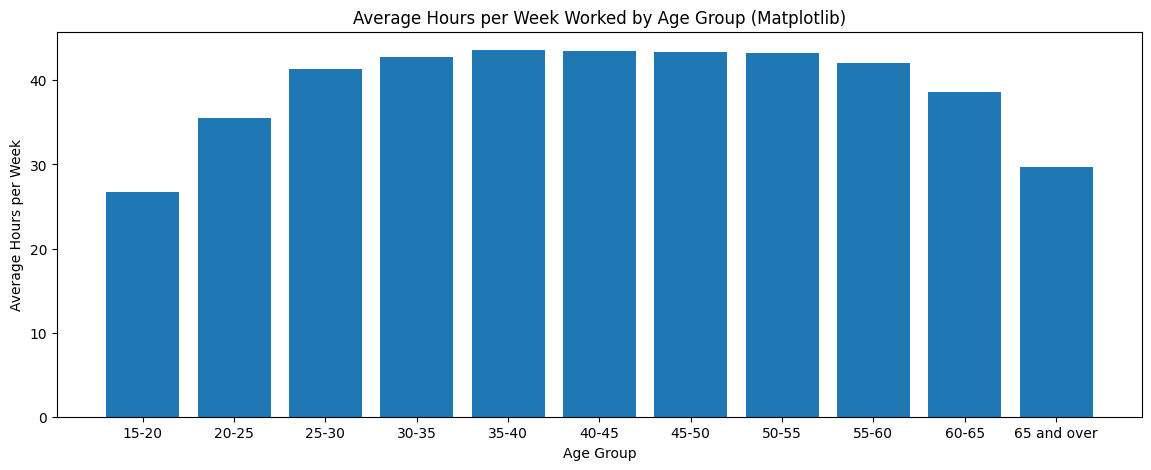

In [36]:
plt.figure(figsize=(14, 5))

# Using Seaborn
sns.barplot(data=avg_hours, x='age_group', y='hours-per-week')
plt.title('Average Hours per Week Worked by Age Group (Seaborn)')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Week')

# Show the Seaborn plot
plt.show()

# Using Matplotlib
plt.figure(figsize=(14, 5))
plt.bar(avg_hours['age_group'], avg_hours['hours-per-week'])
plt.title('Average Hours per Week Worked by Age Group (Matplotlib)')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Week')

# Show the Matplotlib plot
plt.show()

#### Findings:
The people from age ranging from 35 to 55 were working more hours compared to other age groups.

##Income Level

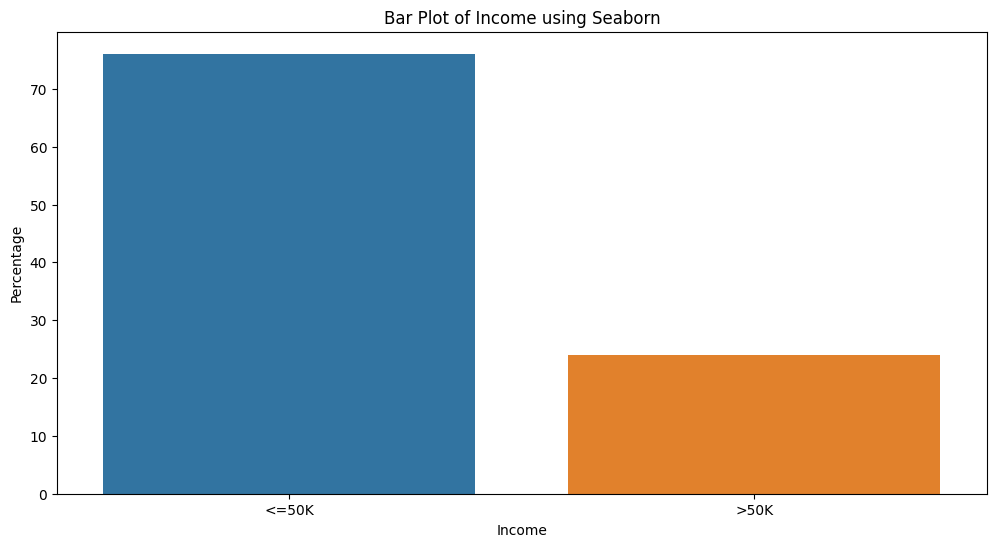

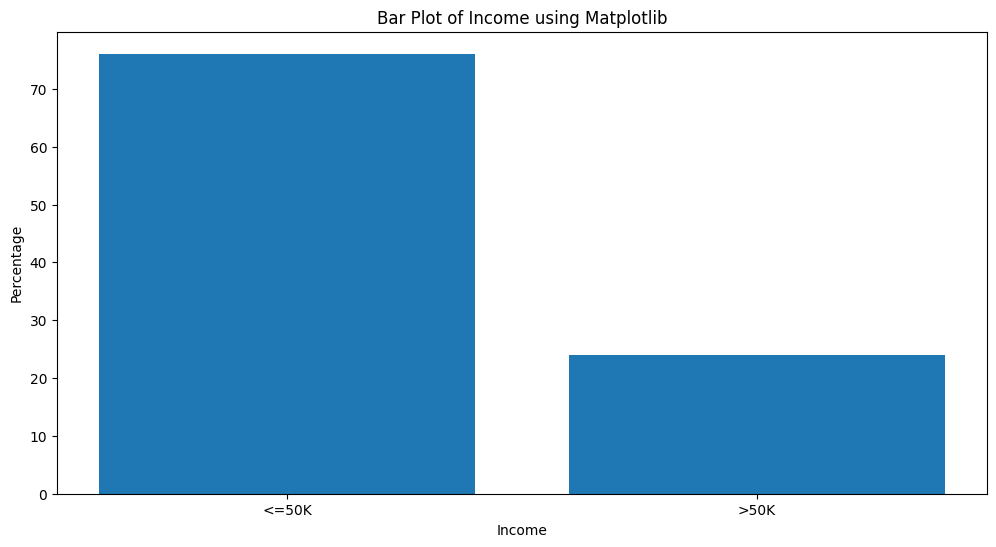

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Using Seaborn
sns.barplot(
    x=adult_df['income'].value_counts().index,
    y=adult_df['income'].value_counts(normalize=True) * 100  # Normalize counts to percentages
)
plt.title('Bar Plot of Income using Seaborn')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.show()

# Using Matplotlib
plt.figure(figsize=(12, 6))
income_percentage = adult_df['income'].value_counts(normalize=True) * 100
plt.bar(income_percentage.index, income_percentage)
plt.title('Bar Plot of Income using Matplotlib')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.show()


#### Findings:
Most of the people have income level <=50K USD per year as per the above analysis as 70% of the people fall under <=50K income level.

###1.Is there evidence of a gender pay gap within this dataset? Analyze income data to determine whether there is a significant difference in earnings between males and females.


In [39]:
adult_df.groupby(['sex', 'income']).size().unstack()

income,<=50K,>50K
sex,,
Female,14423,1769
Male,22732,9918


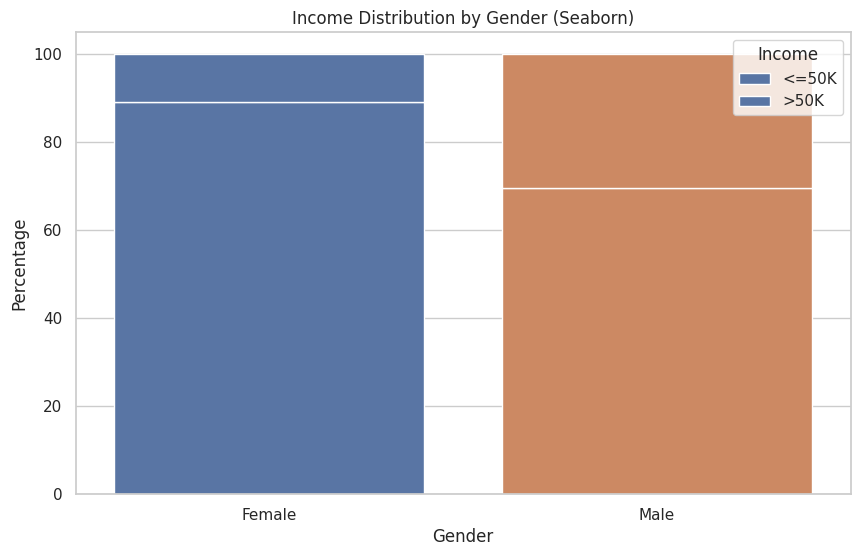

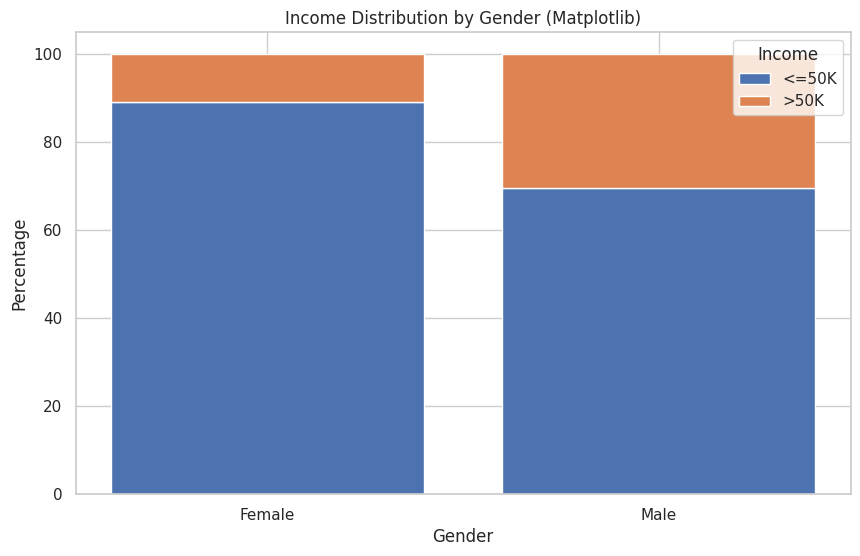

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by 'sex' and 'income', and unstacking the result
grouped_data = adult_df.groupby(['sex', 'income']).size().unstack()

# Calculating percentages within each gender category
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=percentage_data.index, y=percentage_data['<=50K'], label='<=50K')
sns.barplot(x=percentage_data.index, y=percentage_data['>50K'], bottom=percentage_data['<=50K'], label='>50K')
plt.title('Income Distribution by Gender (Seaborn)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Income')
plt.show()

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(percentage_data.index, percentage_data['<=50K'], label='<=50K')
plt.bar(percentage_data.index, percentage_data['>50K'], bottom=percentage_data['<=50K'], label='>50K')
plt.title('Income Distribution by Gender (Matplotlib)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Income')
plt.show()


There is gender pay gap as can observe that more people in income level >50k are males very huge difference in the pay

In [43]:
adult_df.groupby(['sex', 'income'])['capital-gain'].mean().unstack()


income,<=50K,>50K
sex,,
Female,122.876586,4313.663652
Male,162.322673,3993.827586


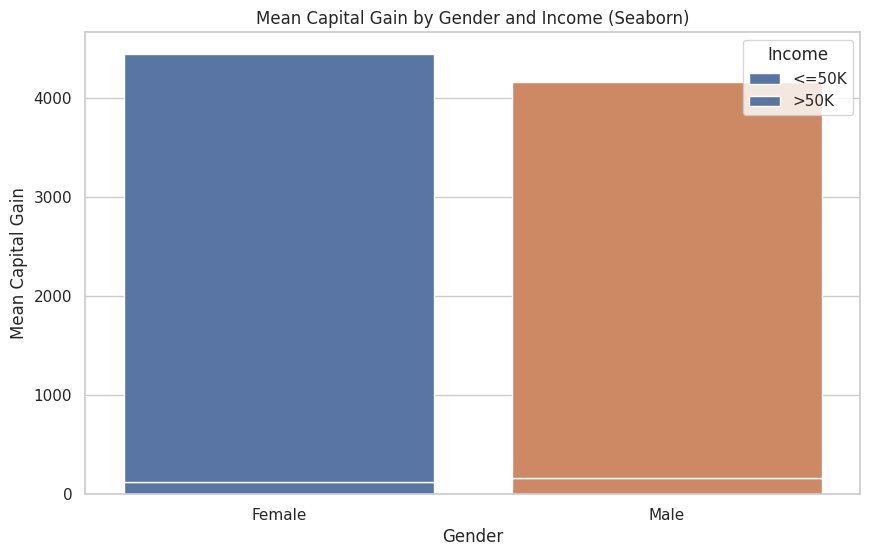

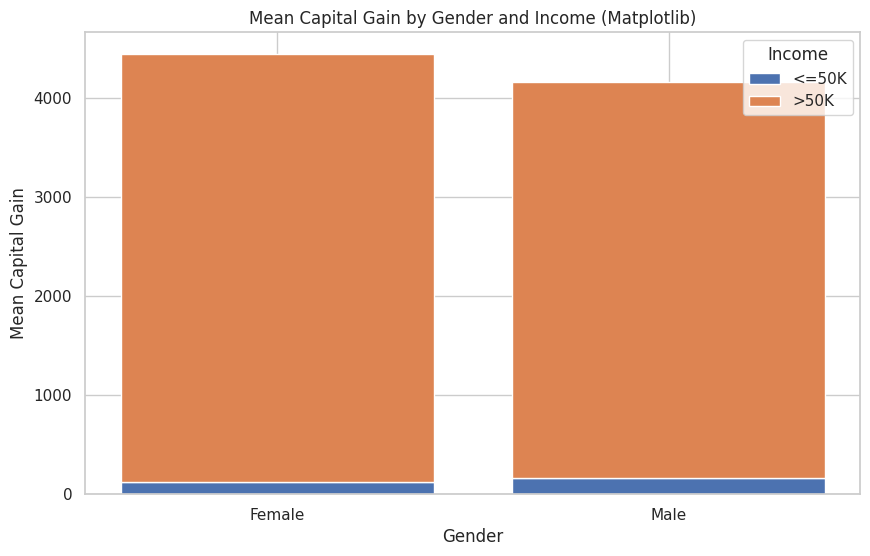

In [44]:
# Grouping by 'sex' and 'income', and unstacking the result to get the mean capital gain
grouped_data = adult_df.groupby(['sex', 'income'])['capital-gain'].mean().unstack()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=grouped_data.index, y=grouped_data['<=50K'], label='<=50K')
sns.barplot(x=grouped_data.index, y=grouped_data['>50K'], bottom=grouped_data['<=50K'], label='>50K')
plt.title('Mean Capital Gain by Gender and Income (Seaborn)')
plt.xlabel('Gender')
plt.ylabel('Mean Capital Gain')
plt.legend(title='Income')
plt.show()

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['<=50K'], label='<=50K')
plt.bar(grouped_data.index, grouped_data['>50K'], bottom=grouped_data['<=50K'], label='>50K')
plt.title('Mean Capital Gain by Gender and Income (Matplotlib)')
plt.xlabel('Gender')
plt.ylabel('Mean Capital Gain')
plt.legend(title='Income')
plt.show()

But in terms of the capital gain Females has higher capital gain who fall under income level >50k but in income range <=50k males are has the upper hand

### 2.Investigate whether individuals with higher education levels tend to achieve greater income mobility and assess the extent to which education is a predictor of income growth.

<Figure size 1200x600 with 0 Axes>

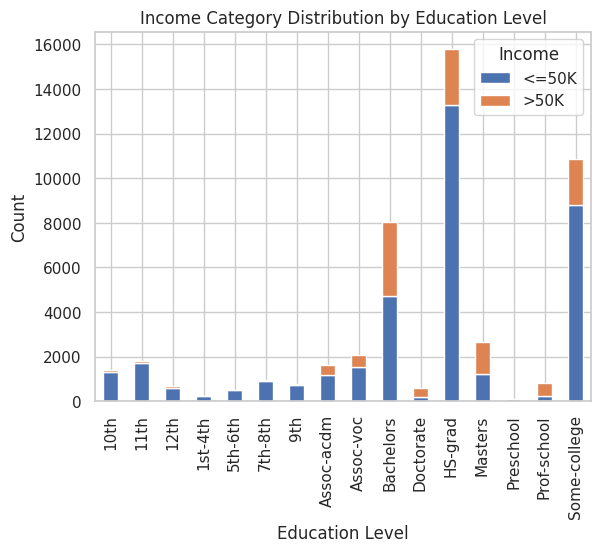

In [45]:
# Calculate the count of individuals in each income category for each education level
income_count_by_education = adult_df.groupby(['education', 'income'])['education'].count().unstack()
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the count of individuals in each income category by education level
income_count_by_education.plot(kind='bar', stacked=True)
plt.title('Income Category Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income', title_fontsize='12')

# Show the plot
plt.show()

It is evident that people with higher education level doesnt assure to get higher income. Instead particularly people with Bachelors and High School Grads are mostly getting income level >50k

###3.Do individuals working longer hours per week tend to earn higher incomes, or is there an optimal work-life balance that leads to better financial outcomes? Analyze the relationship between hours worked per week and income.

In [46]:
adult_df.groupby('income')['hours-per-week'].mean()

income
<=50K    38.840048
>50K     45.452896
Name: hours-per-week, dtype: float64

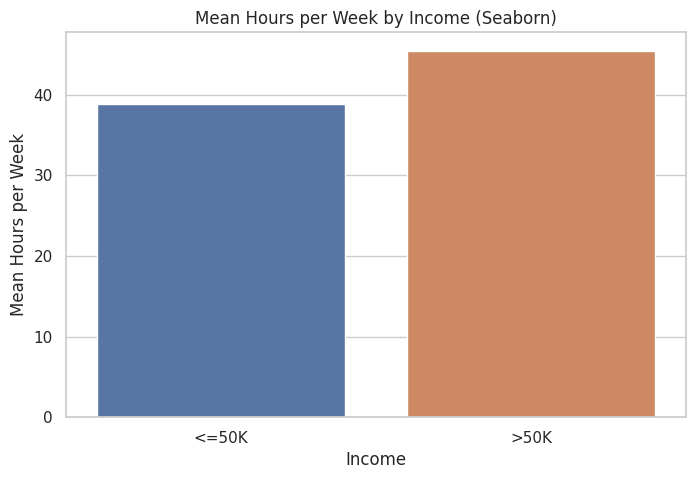

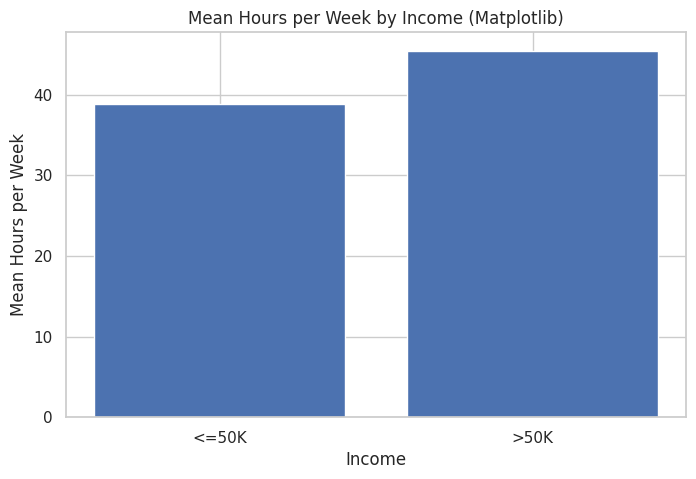

In [47]:
# Grouping by 'income' and calculating the mean hours-per-week
grouped_data = adult_df.groupby('income')['hours-per-week'].mean()

# Plotting with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped_data.index, y=grouped_data)
plt.title('Mean Hours per Week by Income (Seaborn)')
plt.xlabel('Income')
plt.ylabel('Mean Hours per Week')
plt.show()

# Plotting with Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(grouped_data.index, grouped_data)
plt.title('Mean Hours per Week by Income (Matplotlib)')
plt.xlabel('Income')
plt.ylabel('Mean Hours per Week')
plt.show()

Obviousuly people working more hours are more likely to fall under income level >50k which means that more working hours will definitely increase your income level but might  effect work life balance badly.

###4.Is there any trend in income level range among the different marital status?

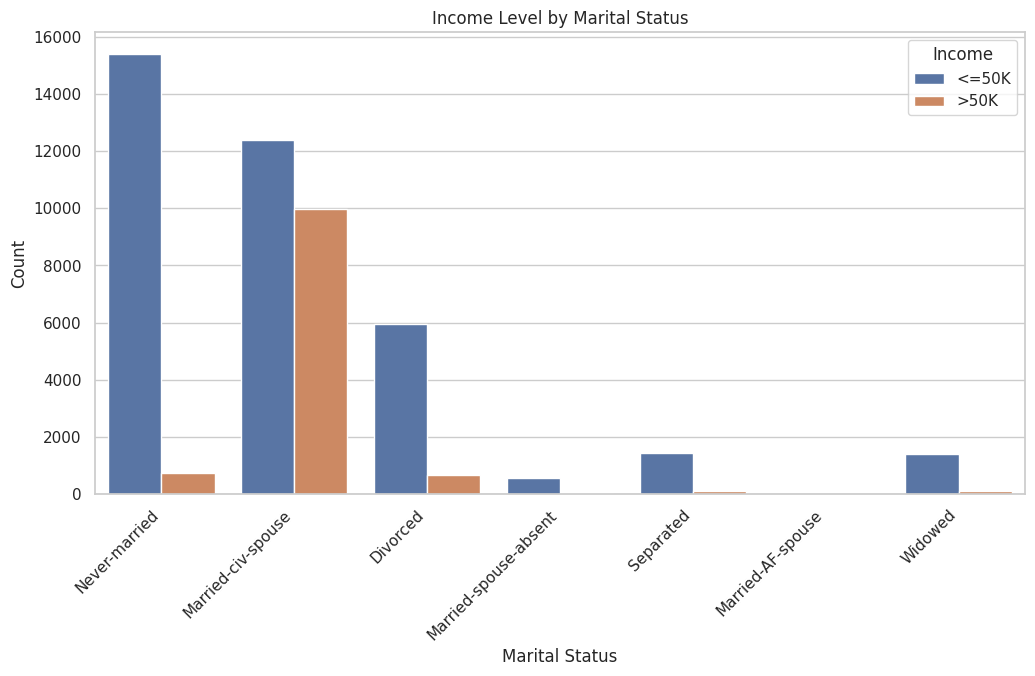

In [50]:
# Create a count plot for income levels based on marital status
plt.figure(figsize=(12, 6))
sns.countplot(x='marital-status', hue='income', data=adult_df)
plt.title('Income Level by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

People who were in a Married -CIV - Spouse has good income levels as we can see that more people has income level >50k compared to others.

#5.Conclusion:


The analysis of the dataset reveals multifaceted patterns in income distribution, showcasing a pronounced gender pay gap with a higher prevalence of males in the >50k income bracket. Unexpectedly, while higher education levels do not uniformly translate to elevated incomes, individuals with Bachelor's and High School education levels are more likely to surpass the 50k income threshold. The correlation between extended work hours and higher income is evident, but the potential sacrifice of work-life balance looms. Notably, marital status emerges as a key determinant, with those in stable relationships, particularly "Married-civ-spouse," displaying higher income levels. Interestingly, females in the >50k income category exhibit greater capital gains, offering a nuanced perspective on financial success beyond salary. In navigating income dynamics, the findings underscore the need for addressing gender disparities, reevaluating assumptions about education's impact, and recognizing the intricate interplay of factors influencing income outcomes in individuals' lives.

## Predictive Analysis

## PROJECT-4

#### Certainly! I'll outline the steps with code snippets for each stage:

#### 1. Define Research Questions:
Let's assume we're interested in predicting income ('<=50K' or '>50K') based on various features.

#### 2. Exploratory Data Analysis (EDA):
Here's a snippet to load your dataset and perform some basic EDA using Pandas:

In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv('adults.csv')

# Display basic info about the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Explore correlations
correlation_matrix = data.corr()
# Visualize correlations, e.g., using seaborn or matplotlib

numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()



   Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   39         State-gov   77516  Bachelors             13   
1           1   50  Self-emp-not-inc   83311  Bachelors             13   
2           2   38           Private  215646    HS-grad              9   
3           3   53           Private  234721       11th              7   
4           4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0           

ValueError: could not convert string to float: 'State-gov'

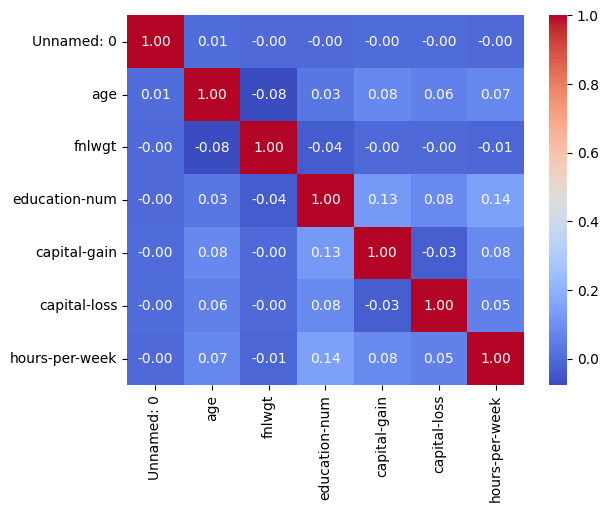

In [23]:
# Visualize correlations, using seaborn or matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### 3. Model Building:
Let's use a simple Logistic Regression model for prediction. Here's an example using Scikit-Learn:

c:\Users\manoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation:
              precision    recall  f1-score   support

       <=50K       0.60      0.93      0.73      4936
      <=50K.       0.94      0.08      0.15      2478
        >50K       0.50      0.59      0.54      1562
       >50K.       0.63      0.03      0.05       793

    accuracy                           0.59      9769
   macro avg       0.67      0.41      0.37      9769
weighted avg       0.67      0.59      0.50      9769

Accuracy: 0.5892107687583171


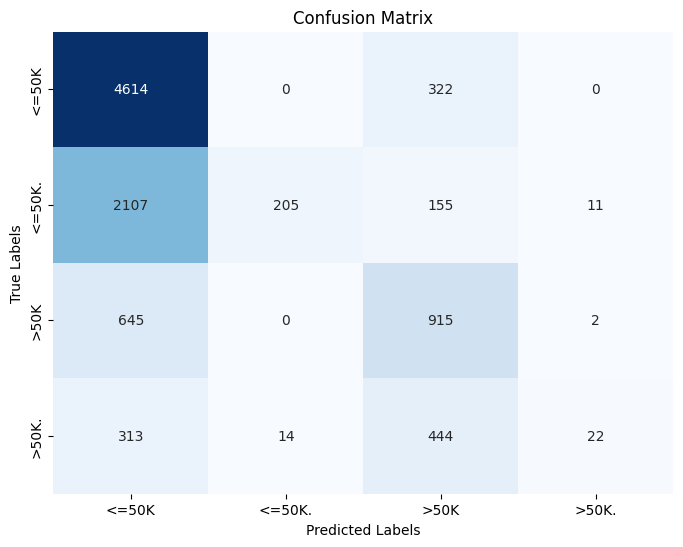

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target variable
features = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
target = 'income'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical features
numeric_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fit the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Model evaluation
print("Model Evaluation:")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#### 4. Cross-Validation and Scikit-Learn Pipeline:
The pipeline is already integrated into the model building process above. To incorporate cross-validation, you can use cross_val_score from Scikit-Learn:

c:\Users\manoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\manoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

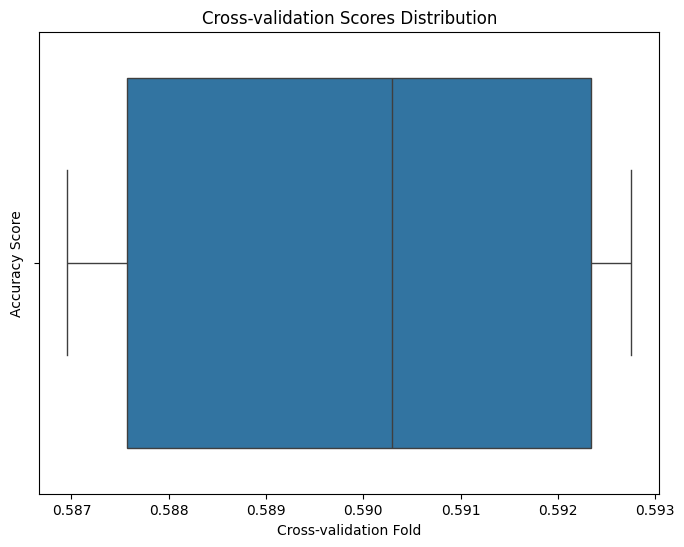

In [17]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Perform cross-validation
cv_scores = cross_val_score(model, data[features], data[target], cv=5)

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.title('Cross-validation Scores Distribution')
plt.xlabel('Cross-validation Fold')
plt.ylabel('Accuracy Score')
plt.show()


### Model Writeup
#### Model Choice:
A Logistic Regression model was selected for its simplicity and interpretability, suitable for binary classification tasks like predicting income categories.

#### Preprocessing:
Numerical Features: Scaled with StandardScaler.
Categorical Features: Encoded via OneHotEncoder.
####    Model Performance:
The model yielded the following results:

#### Accuracy: 58.92%
Cross-Validation Mean Accuracy: 59.00%
#### Insights:
Model Accuracy: The model achieves an accuracy of 58.92%, indicating its capability to predict income categories. However, it's important to note that the accuracy is moderately above chance.
Cross-Validation: Cross-validation demonstrates consistent performance across folds with a mean accuracy of 59.00%, indicating stability in the model's predictive ability.
#### Limitations and Future Steps:
Feature Importance: Further analysis could reveal feature importance to understand which variables strongly influence income predictions.
Model Enhancement: Experimentation with different models or feature engineering might improve predictive performance.
#### Conclusion:
The Logistic Regression model provides insights into income prediction, showing potential for prediction based on the provided dataset. However, its accuracy is moderate, leaving room for improvement through feature exploration or model enhancements.

#6.References:

1. https://archive.ics.uci.edu/dataset/2/adult
    
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
    
3. https://www.bls.gov/careeroutlook/2018/data-on-display/education-pays.htm

4. https://docs.kanaries.net/articles/exploratory-data-analysis-python-pandas

5. https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

6. https://machinelearningmastery.com/data-visualization-in-python-with-matplotlib-seaborn-and-bokeh/